In [1]:
import talib
import pandas as pd
import connectorx as cx
import numpy as np
from importlib import reload

In [221]:
import datafunc; reload(datafunc)
from datafunc import *

In [215]:
vars = ['ticker', 'date', 'close', 'volume']
df = get_top_stocks_cx(5000, since='2020-01-01', vars=vars)

In [4]:
now = df[df.date == df.date.max()].copy()

In [ ]:
df['mdiff'] = 1 -  add_ma_diff(df, 252)
df['score'] = add_score(df, ['mdiff', 'volume'])

In [ ]:
srt = now.sort_values('score', ascending=False)
srt.reset_index(inplace=True)

In [10]:
tlist = list(now.nlargest(12, 'score')['ticker'])

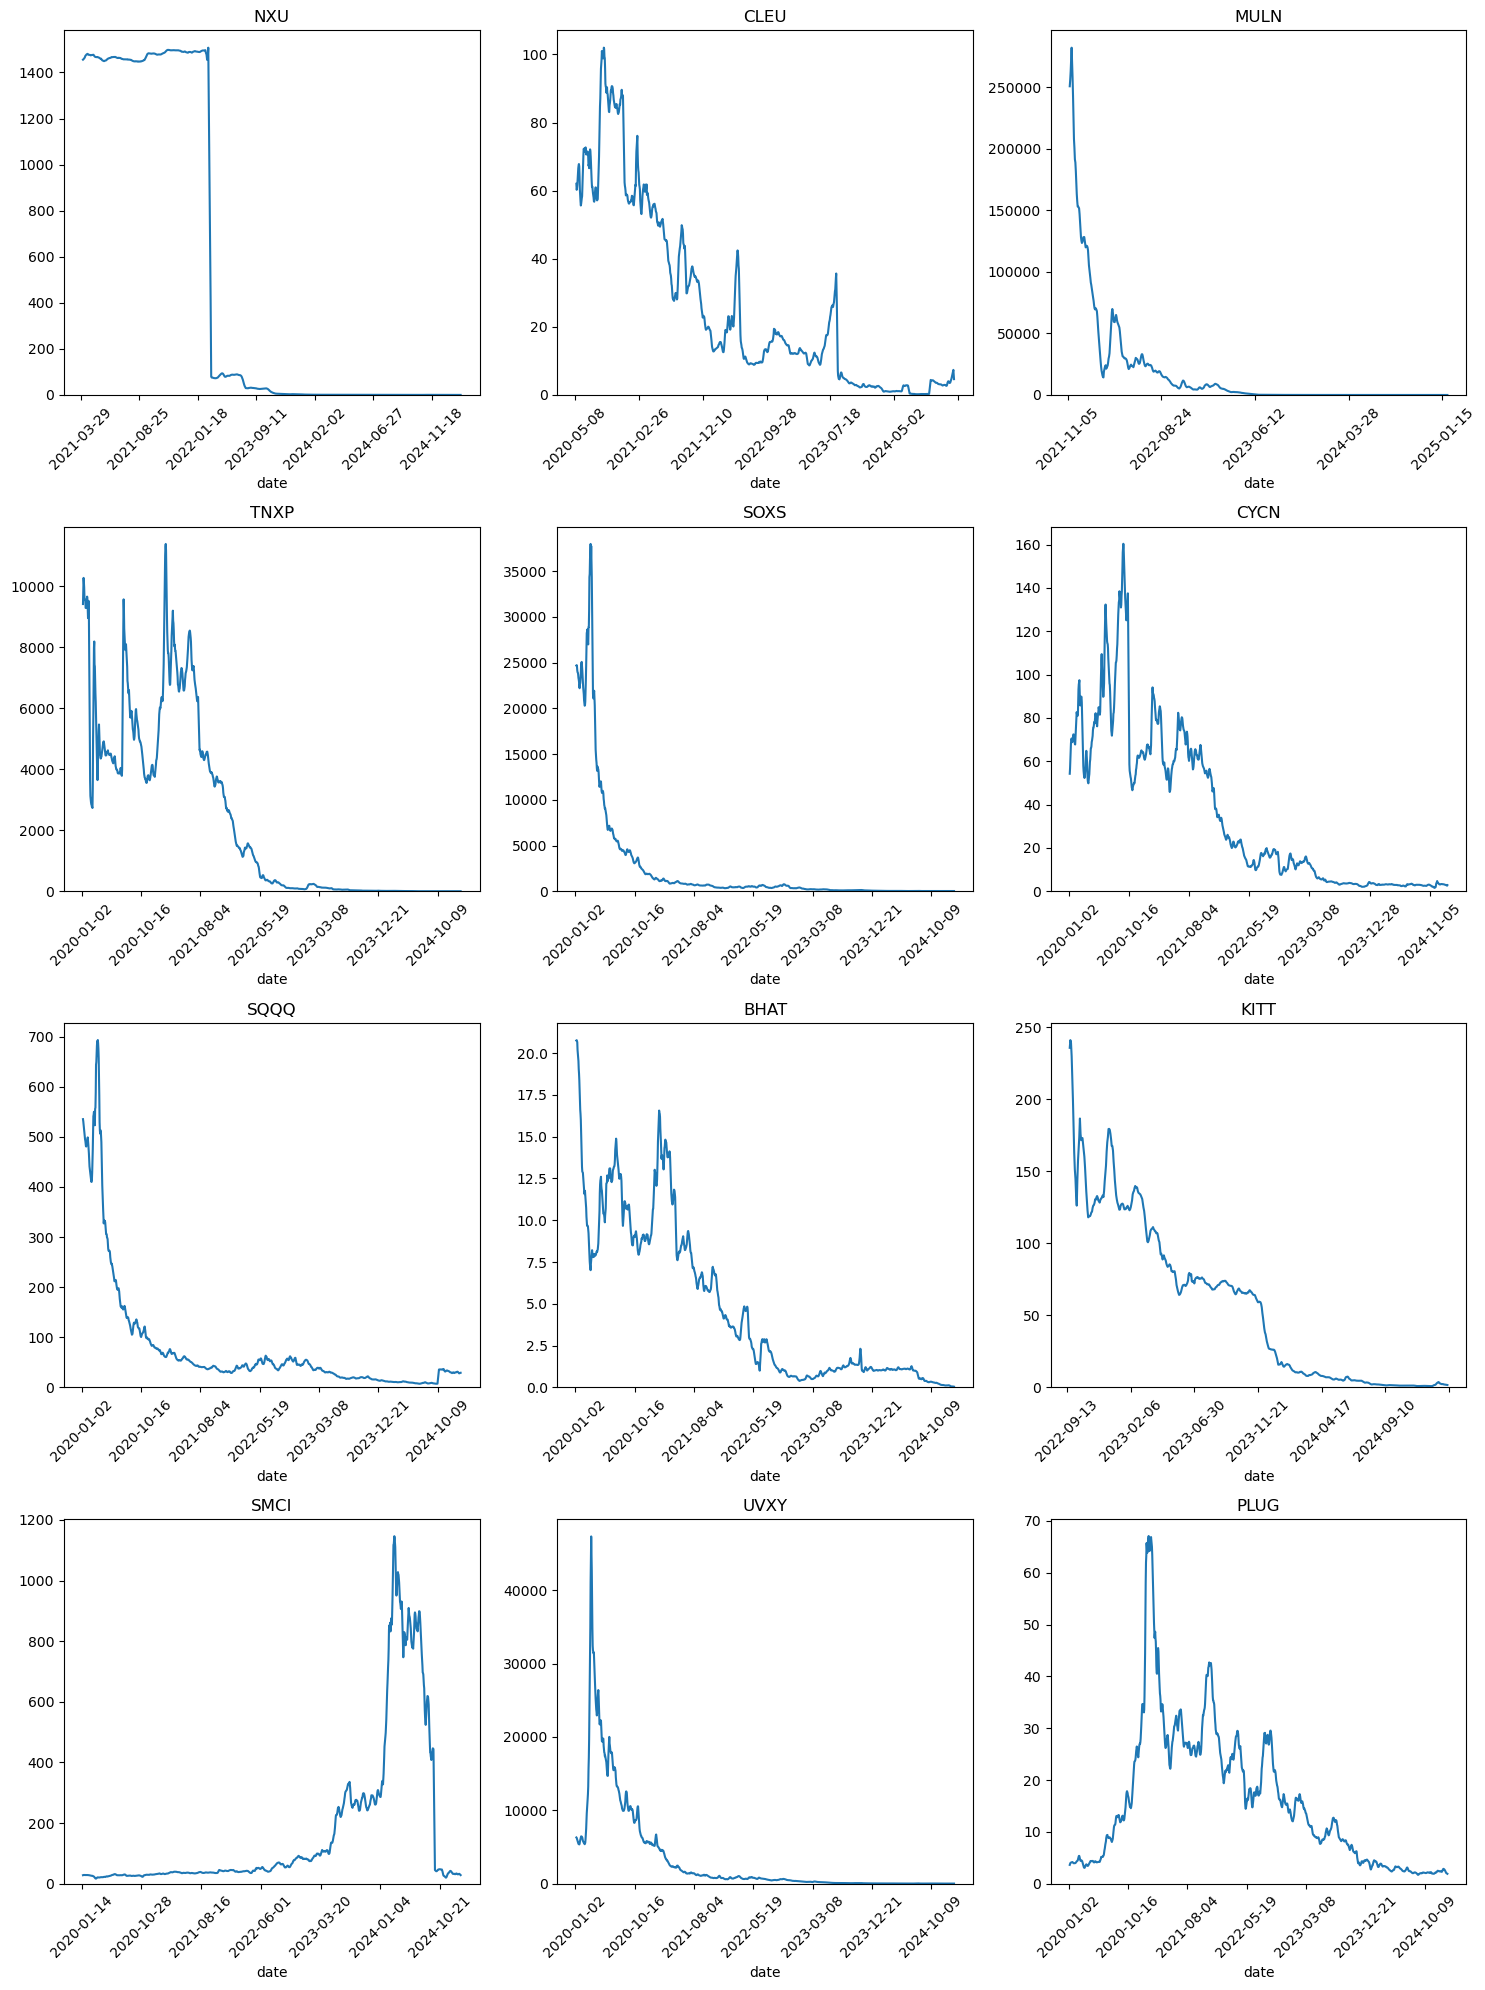

In [11]:
plot_list(df, tlist)

In [239]:
now['mdiff_vol'] = add_score(now, ['mdiff', 'volume'])

In [128]:
pypl = df[df.ticker=='PYPL']

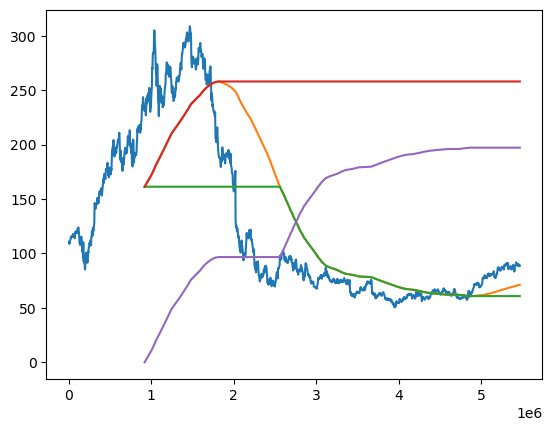

In [129]:
plt.plot(pypl.close)
plt.plot(pypl.ma252)
plt.plot(pypl.malow)
plt.plot(pypl.mahigh)
plt.plot(pypl.madiff)

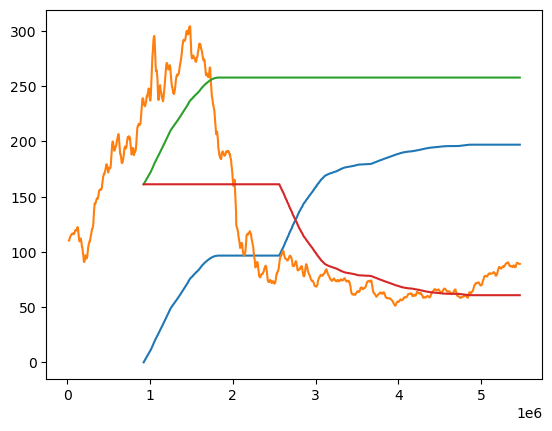

In [108]:
plt.plot(get_ma_diff(pypl.close, 252))
plt.plot(talib.SMA(pypl.close, 5))
plt.plot(pd.Series(talib.SMA(pypl.close, 252)).cummax())
plt.plot(pd.Series(talib.SMA(pypl.close, 252)).cummin())

In [54]:
df['distance30'] = df.groupby('ticker')['close'].transform(lambda x: getdistance(x, n=30))
df['distance90'] = df.groupby('ticker')['close'].transform(lambda x: getdistance(x, n=90))
df['distance180'] = df.groupby('ticker')['close'].transform(lambda x: getdistance(x, n=180))

In [28]:
list(now.nlargest(12, 'distance').ticker)

['VIAV',
 'REBN',
 'BEN',
 'SRTS',
 'TFSL',
 'FLG',
 'TEAM',
 'PMT',
 'SOPA',
 'GROY',
 'OSK',
 'RBC']

In [ ]:
df['low'] = n_week_low(df, 52)
df['high'] = n_week_high(df, 52)
df['lowdistance'] = df['close'] / df['low']
df['highdistance'] = df['high'] / df['close']

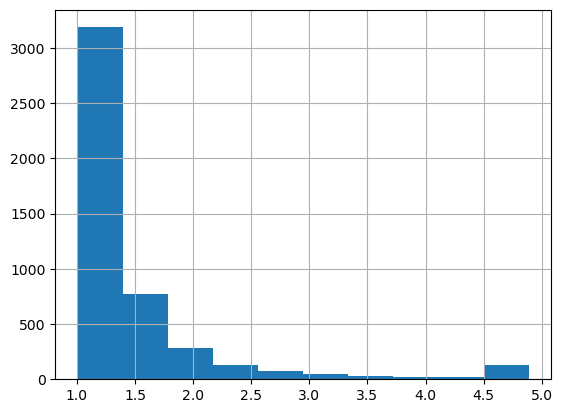

In [ ]:
hist(df, 'lowdistance', 1, latest=True)
hist(df, 'highdistance', 0.99, latest=True)

In [173]:
df['ldlog'] = np.log(df.lowdistance)
df['hdlog'] = np.log(df.highdistance)

In [ ]:
###### 

In [231]:
df['maorder'] = get_ma_order(df, [20, 50, 100])


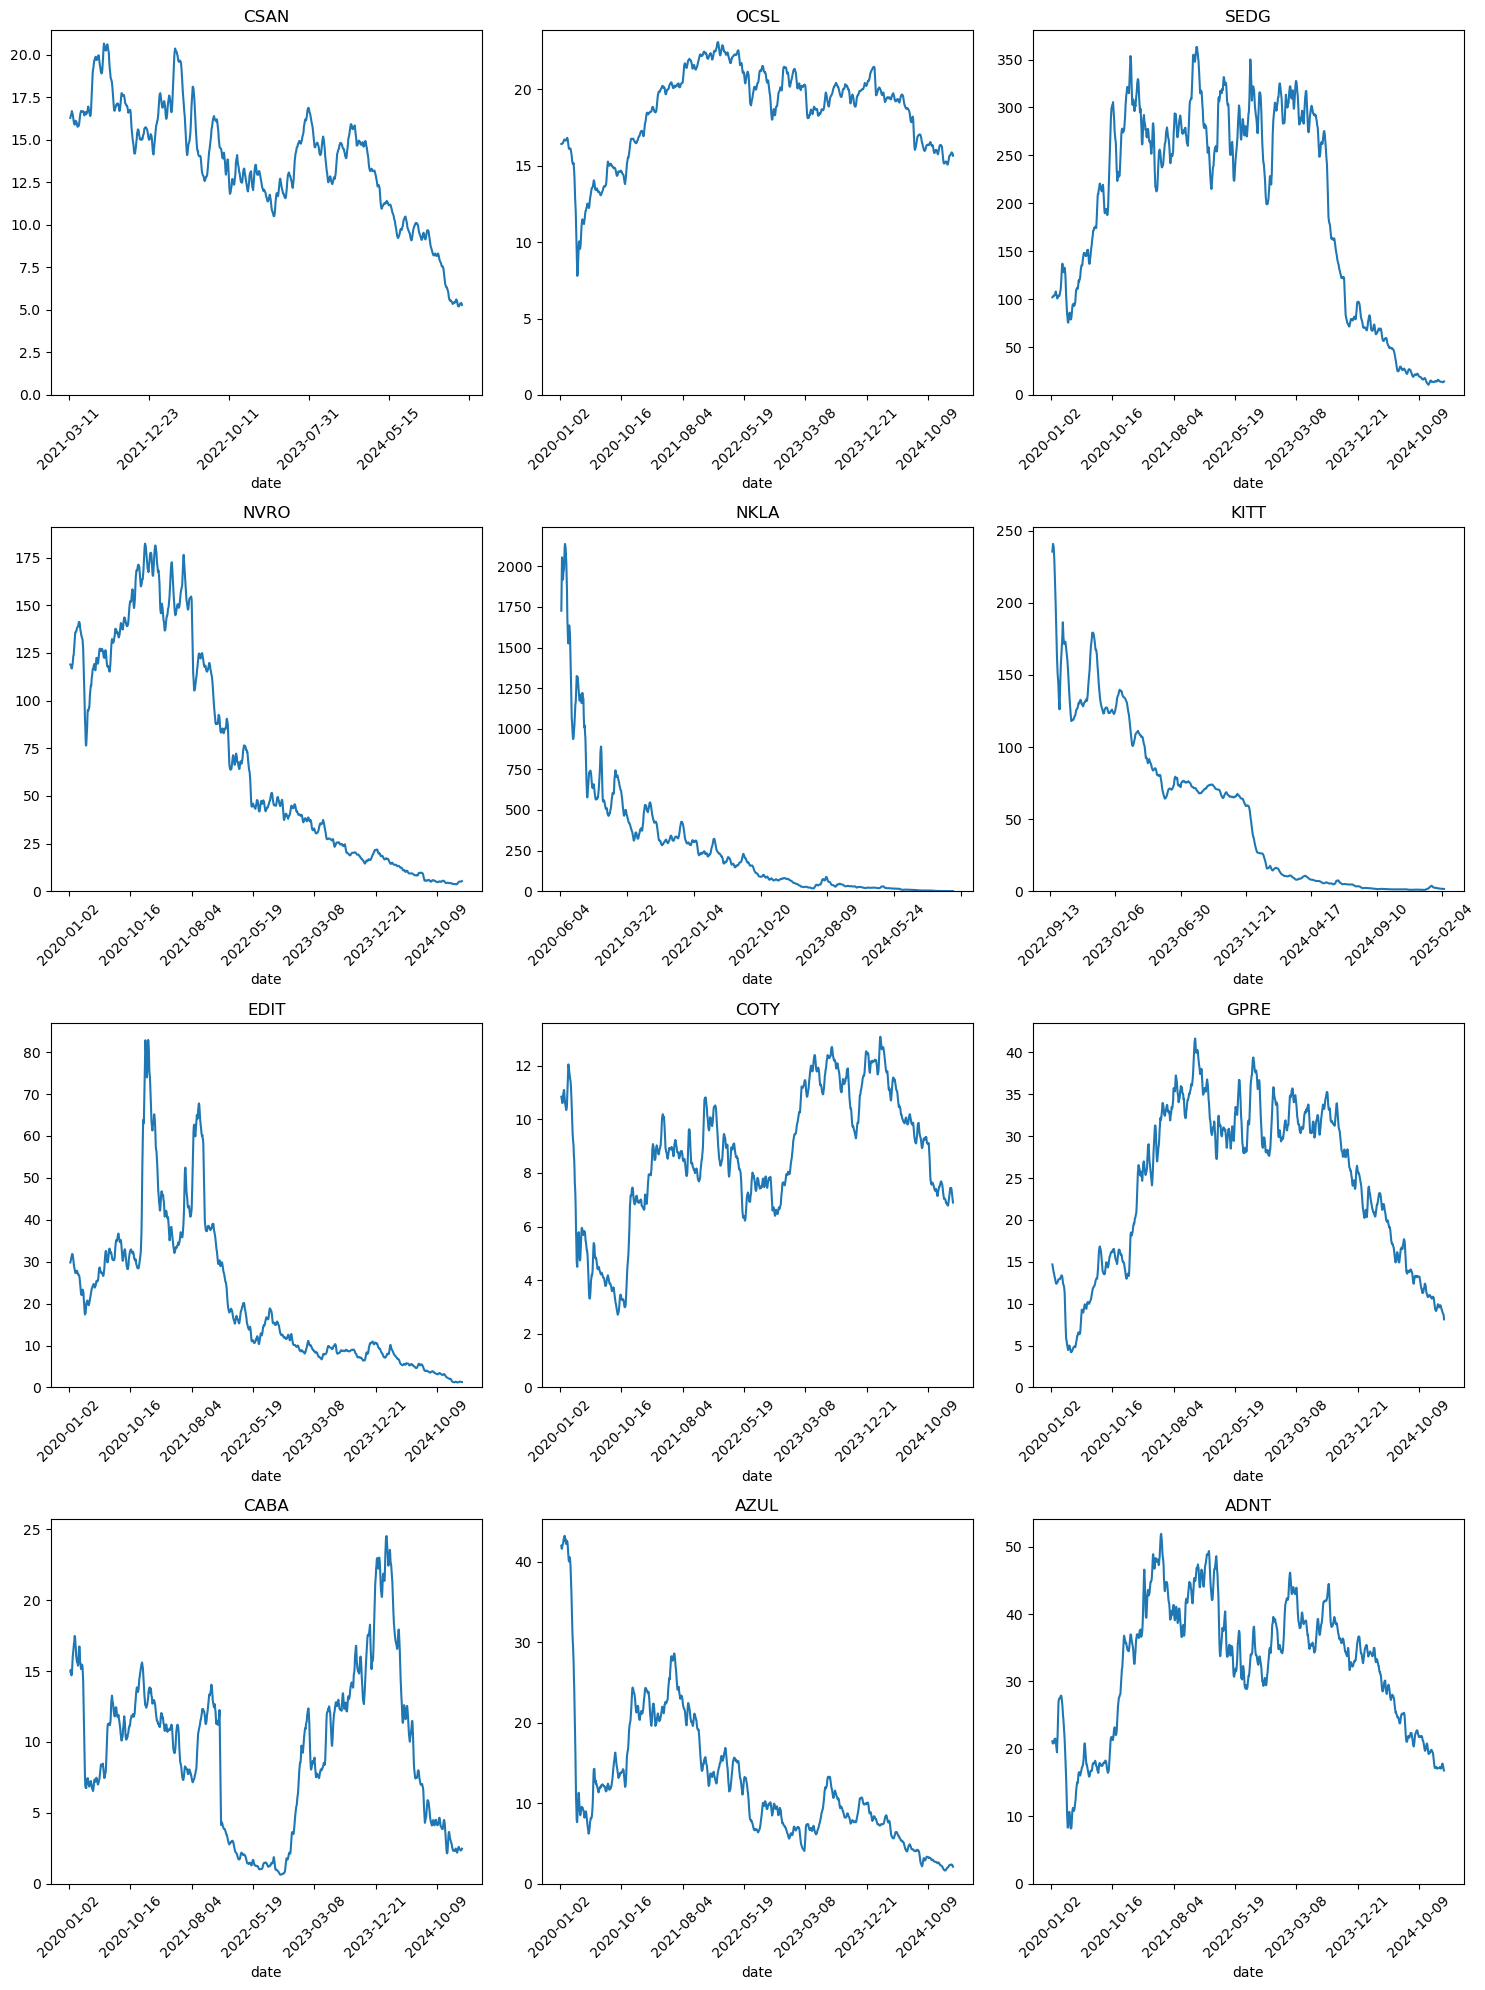

In [232]:
plot_by_var(df, 'maorder', 'sum', from_date='2024-03-01')